## ANALYSING RETURNS - Module 1 Graded Quiz 
##### salimt

In [47]:
import pandas as pd
import numpy as np
import sys
!{sys.executable} -m pip install matplotlib

## Annualizing Returns

To annualize a return for a period, you compound the return for as many times as there are periods in a year. For instance, to annualize a monthly return you compund that return 12 times. The formula to annualize a monthly return $R_m$ is:

$$ (1+R_m)^{12} - 1$$

To annualize a quarterly return $R_q$ you would get:

$$ (1+R_q)^{4} - 1$$

And finally, to annualize a daily return $R_d$ you would get:

$$ (1+R_d)^{252} - 1$$

**The Annualized Return  and Annualized Volatility of the Lo 20 AND Hi 20 portfolios over the entire period**

In [1]:
prices = pd.read_csv("data\\Portfolios_Formed_on_ME_monthly_EW.csv",header = 0, index_col=0, parse_dates=True, 
na_values=-99.99)
prices.index = pd.to_datetime(prices.index, format="%Y%m")
prices.index = prices.index.to_period('M')
prices.head()

NameError: name 'pd' is not defined

In [5]:
returns = prices[['Lo 20', 'Hi 20']]
returns = returns/100
returns.head()

,Lo 20,Hi 20
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


In [6]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months) - 1
annualized_return = (return_per_month + 1)**12-1
annualized_return

Lo 20    0.151977
Hi 20    0.098490
dtype: float64

In [7]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

Lo 20    0.336701
Hi 20    0.195116
dtype: float64

**The Annualized Return and Annualized Volatility of the Lo 20 AND Hi20 portfolios over the period 1999 - 2015 (both inclusive)**

In [8]:
return9915 = returns["1999":"2015"]
n_months = return9915.shape[0]
return_per_month = (return9915+1).prod()**(1/n_months) - 1
annualized_return9915 = (return_per_month + 1)**12-1
annualized_return9915

Lo 20    0.114426
Hi 20    0.062865
dtype: float64

In [9]:
annualized_vol9915 = return9915.std()*np.sqrt(12)
annualized_vol9915

Lo 20    0.228894
Hi 20    0.172713
dtype: float64

<AxesSubplot:>

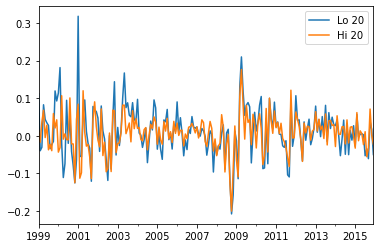

In [13]:
return9915.plot()

**The Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the SmallCap (Lo 20) portfolio**

<AxesSubplot:>

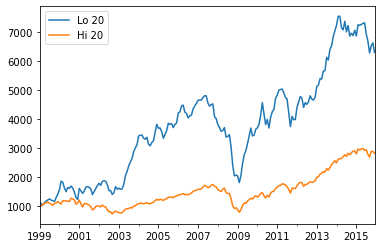

In [52]:
wealth_index = 1000*(1+return9915).cumprod()
wealth_index_max = wealth_index.min()
wealth_index.plot()

In [69]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

In [70]:
drawdown(return9915["Lo 20"])["Drawdown"].min()

-0.6248092431236988

In [71]:
drawdown(return9915["Lo 20"])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [72]:
drawdown(return9915["Hi 20"])["Drawdown"].min()

-0.5527349978713653

In [73]:
drawdown(return9915["Hi 20"])["Drawdown"].idxmin()

Period('2009-02', 'M')

**Since 2009 (including all of 2009) through 2018 which Hedge Fund Index has exhibited the highest semideviation**

In [16]:
prices = pd.read_csv("data\\edhec-hedgefundindices.csv",header = 0, index_col=0, parse_dates=True, 
na_values=-99.99)
prices.index = pd.to_datetime(prices.index, format="%Y%m")
prices.index = prices.index.to_period('M')
prices.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,1.19,3.93,1.78,7.91,1.89,2.13,1.91,5.73,2.81,1.50,1.80,-1.66,3.17
1997-02,1.23,2.98,1.22,5.25,1.01,0.84,1.22,1.75,-0.06,0.34,1.18,4.26,1.06
1997-03,0.78,-0.21,-0.12,-1.20,0.16,-0.23,1.09,-1.19,-0.84,0.60,0.10,7.78,-0.77
1997-04,0.86,-1.70,0.30,1.19,1.19,-0.05,1.30,1.72,0.84,-0.01,1.22,-1.29,0.09
1997-05,1.56,-0.15,2.33,3.15,1.89,3.46,1.18,1.08,3.94,1.97,1.73,-7.37,2.75


In [22]:
prices09 = prices["2009":]
prices09.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2009-01,4.91,-0.16,0.82,-1.12,0.79,1.32,1.12,0.29,-0.17,0.56,1.00,2.82,0.60
2009-02,1.64,-0.31,-1.22,-1.33,-0.46,-0.91,0.65,-0.55,-1.61,0.06,-0.16,3.28,-0.37
2009-03,2.35,-1.80,0.22,3.50,0.21,1.17,0.57,0.48,1.88,1.25,1.00,-4.62,0.08
2009-04,5.00,-1.40,3.87,6.63,-0.12,3.37,2.21,1.27,3.75,0.81,3.42,-8.20,0.92
2009-05,5.78,2.13,5.04,8.84,1.46,4.42,3.65,3.48,5.16,1.07,3.92,0.08,3.12


In [23]:
def semideviation(r):
    """
    Returns the semideviation aka negative semideviation of r
    r must be a Series or a DataFrame, else raises a TypeError
    """
    is_negative = r < 0
    return r[is_negative].std(ddof=0)

In [37]:
semidev = semideviation(prices09)
semidev.sort_values(ascending=False)

Short Selling             2.124006
Emerging Markets          1.527598
Long/Short Equity         1.213857
CTA Global                1.099578
Event Driven              1.013464
Distressed Securities     0.949845
Funds Of Funds            0.794842
Convertible Arbitrage     0.668103
Relative Value            0.571123
Equity Market Neutral     0.518610
Global Macro              0.507508
Merger Arbitrage          0.361121
Fixed Income Arbitrage    0.332054
dtype: float64

In [38]:
semidev.idxmax()

'Short Selling'

In [39]:
semidev.idxmin()

'Fixed Income Arbitrage'

In [76]:
def skewness_kurtosis(r, deg):
    """
    Alternative to scipy.stats.skew()
    Computes the skewness of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**deg).mean()
    return exp/sigma_r**deg

In [77]:
skew = skewness_kurtosis(prices09,3)
skew.sort_values(ascending=False)

Convertible Arbitrage     1.305911
Fixed Income Arbitrage    1.121453
Short Selling             0.456518
Global Macro              0.348184
Relative Value            0.159953
CTA Global                0.052062
Emerging Markets          0.033123
Distressed Securities    -0.254944
Long/Short Equity        -0.463703
Event Driven             -0.488821
Merger Arbitrage         -0.551065
Funds Of Funds           -0.646908
Equity Market Neutral    -0.896327
dtype: float64

In [78]:
kurtosis_d = skewness_kurtosis(prices00,4)
kurtosis_d.sort_values(ascending=False)

Fixed Income Arbitrage    33.378729
Convertible Arbitrage     23.001449
Equity Market Neutral     20.329621
Relative Value            12.731096
Funds Of Funds             7.584725
Distressed Securities      6.231720
Emerging Markets           5.941289
Event Driven               5.543444
Merger Arbitrage           4.520785
Long/Short Equity          4.472589
Short Selling              4.352758
Global Macro               3.653278
CTA Global                 2.845022
dtype: float64

In [79]:
prices00 = prices["2000":]
prices00.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2000-01,2.27,1.28,0.88,0.77,0.75,0.88,0.41,0.21,0.75,1.43,1.73,4.27,1.69
2000-02,2.67,-0.22,4.21,5.28,2.53,3.46,0.97,4.08,6.99,2.39,1.85,-13.40,6.66
2000-03,2.43,-1.38,1.03,3.18,1.34,0.69,-0.61,-1.04,0.06,1.31,1.63,-2.30,0.39
2000-04,2.23,-2.41,-1.01,-5.41,1.68,-0.59,-0.06,-3.04,-2.01,1.88,0.92,10.28,-2.69
2000-05,1.49,1.14,-1.32,-4.33,0.62,-0.34,1.07,-0.70,-0.97,1.46,0.80,7.04,-1.22
